# Amazon Reviews

## Imports & Readings


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'/Users/paulbojan/Documents/TU Wien/2.Semester/Machine Learning/assignments/ex1/local'

In [100]:
amazon_train = pd.read_csv('datasets/review_train.csv')
amazon_test = pd.read_csv('datasets/review_test.csv')

In [97]:
#display(amazon_train)
print(amazon_train.shape)

amazon_train.head()

(750, 10002)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,17,4,8,8,9,4,0,2,3,...,0,0,0,0,0,0,0,1,1,Shea
1,1,21,9,5,8,6,2,16,3,12,...,0,0,0,2,2,1,0,1,0,Riley
2,2,9,7,6,3,8,2,9,4,4,...,0,0,0,0,0,0,0,1,1,Chachra
3,3,8,3,5,2,4,3,8,2,4,...,0,0,1,0,1,0,0,0,0,Agresti
4,4,15,8,8,4,7,8,4,7,1,...,0,0,0,0,0,0,0,0,0,Nigam


In [38]:
print(amazon_test.shape)

amazon_test.head()

NameError: name 'amazon_test' is not defined

## Sparsity

There are some columns in wich are nearly all the values are 0. It could make sense to drop these columns. But if we runnning a PCA, columns with a lot of zeros are less considered anyway. The sparsity level is abnoout 85%. 

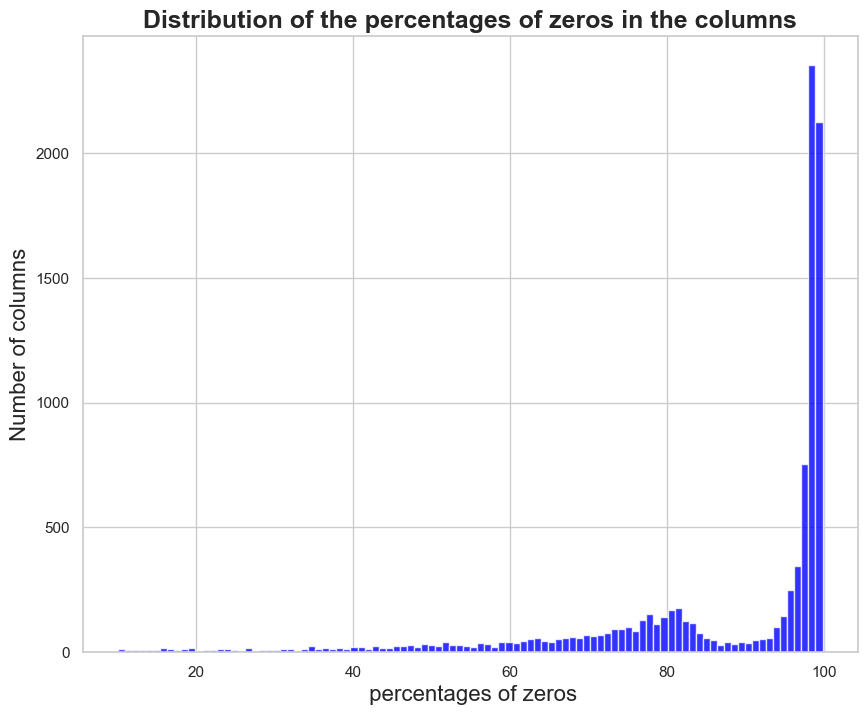

(750, 10002)


In [59]:
import pandas as pd

def column_with_zero(df, threshold = 10):
    results = []
    
    for col in df.columns:
        coun_zero = (df[col] == 0).sum()
        number_cols = len(df["Class"])

        percent_zero = (coun_zero / number_cols) * 100
        if percent_zero >= threshold:
            results.append({'Column Name': col, 'Percentage': percent_zero})
 
    result_df = pd.DataFrame(results)
    return result_df

df_temp = column_with_zero(amazon_train)

# PLot distribution
plt.figure(figsize=(10, 8))

plt.hist(df_temp['Percentage'], bins=100, color='blue', alpha=0.8)
plt.title('Distribution of the percentages of zeros in the columns', fontsize=18, fontweight='bold')
plt.xlabel(' percentages of zeros', fontsize=16)
plt.ylabel('Number of columns', fontsize=16)
plt.grid(True)
plt.show()

print(amazon_train.shape)


In [62]:
def calculate_sparsity(df):

    zero_count = (df == 0).sum().sum()
    total_elements = df.size

    sparsity = (zero_count / total_elements) * 100

    return sparsity

calculate_sparsity(amazon_train)

85.30448576951277

In [ ]:
# Lets drop the columns with more then 95% zeros to simplify the model

# filter temp_df
#df_temp = df_temp[df_temp['Percentage'] >= 95]
#cols_to_drop = df_temp['Column Name'].values

# drop columns, create copy 
#amazon_train_copy = amazon_train.drop(cols_keep, axis=1).copy(deep=True)
#amazon_train = amazon_train.drop(cols_to_drop, axis=1).copy(deep=True)


#print(amazon_train.shape)

In [ ]:
amazon_train.drop(['ID'], axis=1, inplace=True)
amazon_train.isna().sum().sum()

0

In [ ]:
amazon_train['Class'].value_counts()

Class
Sherwin        20
Chachra        19
Wilson         19
Power          19
Comdet         19
Davisson       18
Merritt        18
Chell          18
Hayes          18
Brody          17
Chandler       17
Corn           16
Cholette       16
Blankenship    16
Shea           16
Goonan         16
Neal           16
Messick        16
Bukowsky       16
Agresti        16
Grove          16
CFH            15
Brown          15
Mahlers2nd     15
Lee            15
Janson         15
Riley          15
Cutey          15
Vernon         15
Calvinnme      15
Harp           15
Lawyeraau      14
Mark           14
Nigam          14
McKee          14
Morrison       14
Robert         14
Vision         13
Johnson        13
Walters        13
Auken          12
Engineer       12
Ashbacher      12
Mitchell       12
Taylor         12
Koenig         12
Kolln          11
Peterson       11
Dent           11
Lovitt         10
Name: count, dtype: int64

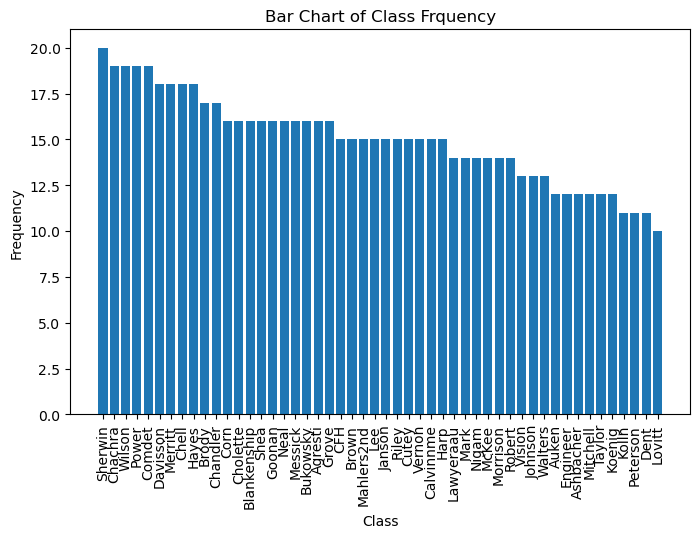

In [ ]:

class_counts = amazon_train['Class'].value_counts()
import matplotlib.pyplot as plt


# Plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)


plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Class Frquency')

# rotate the x-axis labels
plt.xticks(rotation=90)


# export the plot
plt.savefig('class_frequency.png')


# Display the plot
plt.show()


## Oversampling the data

First Split the data into train and test data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

def split_and_oversample(X, y, test_size=0.25, random_state=123):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Oversampling 
    ros = RandomOverSampler(random_state=random_state)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    

    return X_train_resampled, y_train_resampled, X_test, y_test


X_train_resampled, y_train_resampled, X_test, y_test = split_and_oversample(amazon_train.drop('Class', axis=1), amazon_train['Class'], random_state=123)

print(X_train_resampled.head(3))
print(y_train_resampled.head(3))

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V9991  V9992  V9993  V9994  \
0   4   5   7   3   4   3   4   0   4    6  ...      0      0      0      2   
1  16   6   2   5   4   3   4   5   6    2  ...      0      2      0      0   
2  18   4   9  12   5   3   2   0   4    6  ...      1      0      0      1   

   V9995  V9996  V9997  V9998  V9999  V10000  
0      0      1      0      0      0       0  
1      0      1      0      0      0       0  
2      1      0      0      0      1       1  

[3 rows x 10000 columns]
0        Lee
1    Sherwin
2      Chell
Name: Class, dtype: object


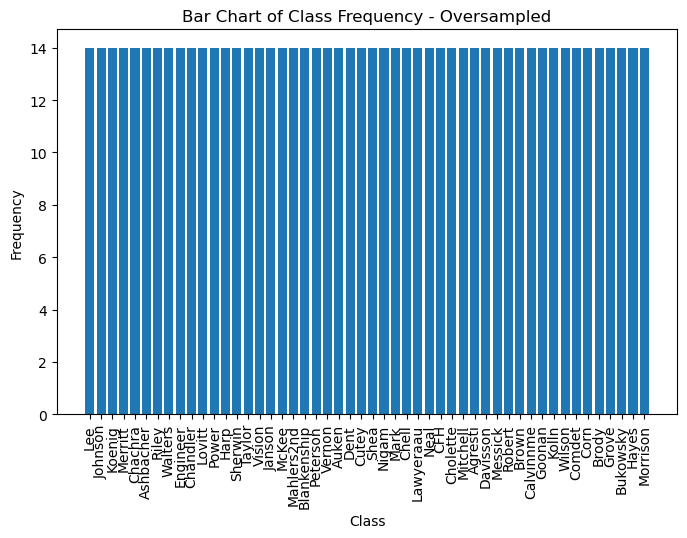

In [ ]:
class_counts = y_train_resampled.value_counts()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)


plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Class Frequency - Oversampled')

# rotate the x-axis labels
plt.xticks(rotation=90)

# Display the plot

# export plot
plt.savefig('class_frequency_oversampled.png')

plt.show()

The frequency of each class is now the same. That prevent, that the classifier tend to predict the minority class!

# Modeling
We will run a multinomial logistic regression since this algroithm seems suitable for a multiclass classification in high dimensional data. 

In [ ]:
# Import models 
from sklearn.linear_model import LogisticRegression

# Import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Other imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Optinal Scaling
scaler = StandardScaler()

# Fit the scaler 
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)


In [ ]:

#X_train_resampled, 
#y_train_resampled, 
#X_test, 
#y_test

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# Fit mdoel
model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred = model.predict(X_test_scaled)


# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7127659574468085


**Not scaled:**

- lbfgs: 0.611 (Accuracy)

- newton-cg: 0.585 

- sag: 0.5691

- saga: 0.579

**Scaled:** 

- lbfgs: 0.712

- newton-cg: 0.712 

- sag: 0.69680

- saga: 0.68


# Dimension reduction

### PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler


In [ ]:
# Split and sample again (for clearity)
X_train_resampled, y_train_resampled, X_test, y_test = split_and_oversample(amazon_train.drop('Class', axis=1), amazon_train['Class'], random_state=123)

# Scale again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=700)  #
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Fit model
model = LogisticRegression(multi_class='multinomial', solver="lbfgs", random_state=123, max_iter=10000)
model.fit(X_train_pca, y_train_resampled)

# Predict
y_pred = model.predict(X_test_pca)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# The resulting data sets from the PCA: 
""""
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.head()


X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.head()

y_train = y_train_resampled.copy(deep=True)
y_train.head()

y_test.head() 
"""

Accuracy: 0.7127659574468085


'"\nX_train_pca = pd.DataFrame(X_train_pca)\nX_train_pca.head()\n\n\nX_test_pca = pd.DataFrame(X_test_pca)\nX_test_pca.head()\n\ny_train = y_train_resampled.copy(deep=True)\ny_train.head()\n\ny_test.head() \n'

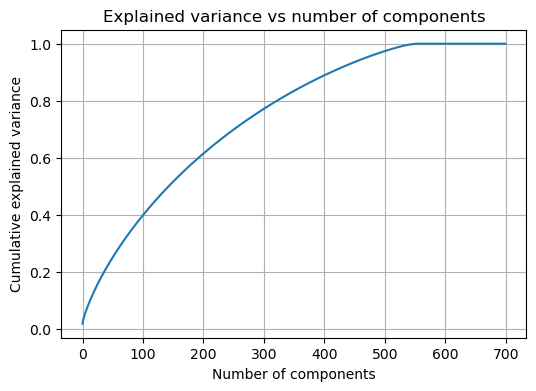

In [ ]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cum_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.grid(True)

# Export plot 
plt.savefig('PCA_Explained_variance.png')

plt.show()

In [ ]:
# Refit the PCA with the number of components that explain ca. 95% of the variance


def pca_resample_split_scale(split_size = 0.25, n_components = 450, scaled = True, df = amazon_train):

    X_train, y_train, X_test, y_test = split_and_oversample(df.drop('Class', axis=1), df['Class'], random_state=123, test_size=split_size)

    if scaled:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)



    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Transform into df 
    X_train_pca = pd.DataFrame(X_train_pca)
    X_test_pca = pd.DataFrame(X_test_pca)


    return X_train_pca, y_train, X_test_pca, y_test


X_train_pca, y_train, X_test_pca, y_test = pca_resample_split_scale()


### SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline


In [ ]:
#X_train_resampled, y_train_resampled, X_test, y_test = split_and_oversample(amazon_train.drop('Class', axis=1), amazon_train['Class'], random_state=123)

n_components = 700

# Build pipline
svd = TruncatedSVD(n_components=n_components, random_state=123)
scaler = StandardScaler()
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=123)

pipeline = make_pipeline(scaler, svd, classifier)

# Train pipline
pipeline.fit(X_train_resampled, y_train_resampled)

# predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7127659574468085


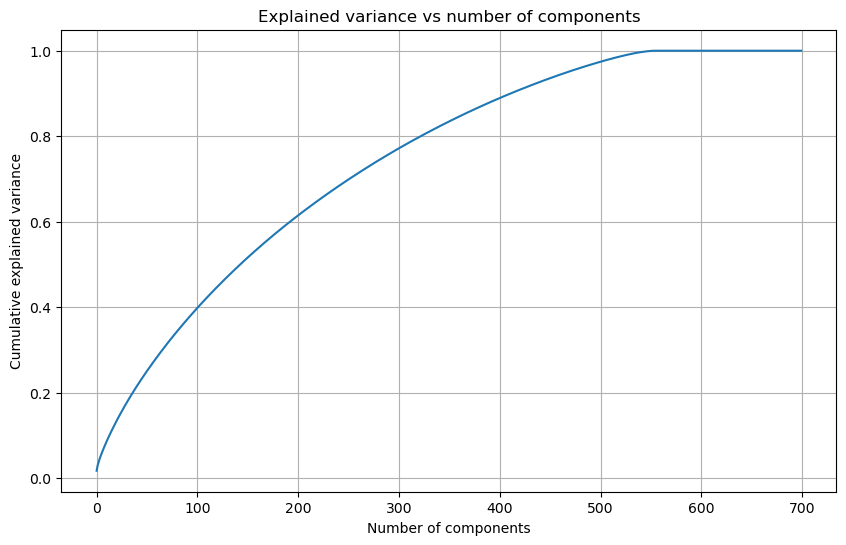

In [ ]:
cum_var = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cum_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.grid(True)
plt.show()

## Summary of dimension reduction:
The most promesing dimension reduction technique seems to be the:

- SVD

- PCA 



# Modeling  
The Logistic Regression seems very promising, but we also try it with other classifiers!

Here are the List of other Classifiers:

- SVM Classifer
- Logistic Regression
- LinearSVC
- Naive Bayes
- MLP Classifier
- KNeighborsClassifier
- KMeans



In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Import pipline
from sklearn.pipeline import make_pipeline

# KNears Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import kmeans
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")


# Pipeline

In [75]:
def print_evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy on Test:", accuracy)
    print("\nReport:")
    print(report)



def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # train model
    model.fit(X_train, y_train)

    # prediction
    y_pred = model.predict(X_test)

    # evaluate on test set
    print_evaluation(y_test, y_pred)

    # cv score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    average_accuracy = np.mean(cv_scores)
    print(f"CV Accuracy for {type(model[-1]).__name__}: {average_accuracy:.4f}")



# Prepare data
preprocessing = make_pipeline(StandardScaler(), PCA(n_components=0.95))


# define models
models = {
    'Logistic Regression': make_pipeline(preprocessing, LogisticRegression(multi_class='multinomial', solver="lbfgs", random_state=123, max_iter=10000)),
    'LinearSVC': make_pipeline(preprocessing, LinearSVC(random_state=123, max_iter=10000)),
    'Naive Bayes': make_pipeline(preprocessing, GaussianNB()),

    # random fore
    'Random Forest': make_pipeline(preprocessing, RandomForestClassifier(random_state=123)),

    # mlp classifier
    'MLP Classifier': make_pipeline(preprocessing, MLPClassifier(random_state=123, max_iter=1000)), 

    'KMeans Classifier': make_pipeline(preprocessing, KNeighborsClassifier(n_neighbors=5)),
}

# Split data
X_train, y_train, X_test, y_test = split_and_oversample(amazon_train.drop('Class', axis=1), amazon_train['Class'], random_state=123, test_size=0.25)


# train models an evaluate
for name, model in models.items():
    print(f"Training and evaluating {name}")
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    #Print a new line and a line separator
    print("\n")
    print("---------------------------------------------------")







Training and evaluating Logistic Regression
Accuracy on Test: 0.6861702127659575

Report:
              precision    recall  f1-score   support

     Agresti       0.83      0.83      0.83         6
   Ashbacher       1.00      0.50      0.67         2
       Auken       1.00      0.40      0.57         5
 Blankenship       1.00      1.00      1.00         6
       Brody       0.67      0.40      0.50         5
       Brown       0.20      1.00      0.33         1
    Bukowsky       1.00      0.80      0.89         5
         CFH       1.00      1.00      1.00         3
   Calvinnme       0.67      1.00      0.80         2
     Chachra       0.33      0.80      0.47         5
    Chandler       0.67      0.67      0.67         6
       Chell       1.00      0.75      0.86         4
    Cholette       1.00      0.33      0.50         3
      Comdet       0.75      1.00      0.86         6
        Corn       0.43      0.75      0.55         4
       Cutey       1.00      1.00      1.00  

# Gridsearch

Since the logistic regression seems very promosing we will invastigate that model in detail. We will perform a grid search where we try different parameter settings

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# Refit the model with the best hyperparameters
# X_train, y_train, X_test, y_test = split_and_oversample(amazon_train.drop('Class', axis=1), amazon_train['Class'], random_state=123, test_size=0.25)

# Scale the data and perfrom PCA 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Possible hyperparameters:

penalty : 
- ‘l1’, ‘l2’, ‘elasticnet’, and ‘none’


The parameter “multi_class” determines how to handle multiple classes in logistic regression
- ‘ovr’, the model will use a one-vs-rest strategy, which means fitting a binary model for each class.
- ‘multinomial’, the model will use the softmax function, which means minimizing the multinomial loss over the whole probability distribution. (solver = ‘liblinear’ not copatible)


C (or regularization strength):
- must be a positive float. 
- Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.




In [77]:
# Define the model
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123, max_iter=10000)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, multi_class='multinomial',
                                    random_state=123))])

In [91]:
# {'logreg__C': 0.01, 'logreg__l1_ratio': 0.2, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}

pipeline = Pipeline([
    ('logreg', LogisticRegression(max_iter=1000, random_state=123)) 
])

# Parameter Grid
param_grid = {
    'logreg__C': [0.1, 0.001, 0.01],
    'logreg__multi_class': ['ovr', 'multinomial'],
    'logreg__solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'logreg__l1_ratio': [0.1, 0.2, 0.3, 0.5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, scoring='accuracy', n_jobs=-1)

# Grid-search 
grid_search.fit(X_train, y_train)

# Best parameter 
print("Best Parameter:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-

Best Parameter: {'logreg__C': 0.001, 'logreg__l1_ratio': 0.1, 'logreg__multi_class': 'ovr', 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Accuracy: 0.46152012031840356


In [93]:
y_pred = grid_search.predict(X_test)
print("Test acc", grid_search.score(X_test, y_test))

Test acc 0.7393617021276596


# Final Model Logistic 

### Logistic regression with best parameters

In [94]:
# Best Parameter: {'logreg__C': 0.01, 'logreg__l1_ratio': 0.2, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}

def model_logistic_regression(X_train, y_train, X_test, y_test):
    lr_model_best = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=10000, random_state=100, multi_class='multinomial', l1_ratio=0.2)
    lr_model_best.fit(X_train, y_train)

    # Predict
    y_pred = lr_model_best.predict(X_test)

    # Evaluate
    print_evaluation(y_test, y_pred)

    cv_scores = cross_val_score(lr_model_best, X_train, y_train, cv=5)
    average_accuracy = np.mean(cv_scores)
    print("CV Accuracy:", average_accuracy)



#X_train_pca, y_train, X_test, y_test = pca_resample_split_scale(scaled=True, split_size=i, n_components=450)
model_logistic_regression(X_train, y_train, X_test, y_test)



Accuracy on Test: 0.7180851063829787

Report:
              precision    recall  f1-score   support

     Agresti       0.75      1.00      0.86         6
   Ashbacher       0.25      0.50      0.33         2
       Auken       0.67      0.40      0.50         5
 Blankenship       1.00      1.00      1.00         6
       Brody       0.50      0.60      0.55         5
       Brown       0.00      0.00      0.00         1
    Bukowsky       0.75      0.60      0.67         5
         CFH       1.00      1.00      1.00         3
   Calvinnme       0.67      1.00      0.80         2
     Chachra       0.42      1.00      0.59         5
    Chandler       0.60      0.50      0.55         6
       Chell       1.00      1.00      1.00         4
    Cholette       1.00      0.33      0.50         3
      Comdet       0.80      0.67      0.73         6
        Corn       0.67      1.00      0.80         4
       Cutey       0.60      1.00      0.75         3
    Davisson       0.75      0.50  

### Final Model - Whole training set

In [101]:

# PCA for the whole dataset
def pca_resample_split_scale(scaled=False, n_components=400, df_train=amazon_train, df_test=amazon_test):

    X = df_train.drop(columns=['Class'])  
    y = df_train['Class']

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X)
    X_Test_transformed = pca.transform(df_test)



    if scaled:
        scaler = StandardScaler()
        X_pca_scaled = scaler.fit_transform(X_train_pca)
        X_Test = scaler.transform(X_Test_transformed)
    else:
        X_pca_scaled = X_train_pca
        X_Test = X_Test_transformed


    ros = RandomOverSampler(random_state=123123)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_pca_scaled, y)

    return X_train_resampled, y_train_resampled, X_Test 


X_train, y_train, X_Test = pca_resample_split_scale(scaled=True, n_components=450, df_train=amazon_train, df_test=amazon_test.drop(['ID'], axis=1))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ID


In [98]:
#logistic_reg_model_final = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100000, random_state=100)
# logreg__C': 0.001, 'logreg__l1_ratio': 0.1, 'logreg__multi_class': 'ovr', 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

logistic_reg_model_final = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=10000, random_state=100, multi_class='multinomial')

logistic_reg_model_final.fit(X_train, y_train)


y_pred = logistic_reg_model_final.predict(X_Test)


NameError: name 'X_Test' is not defined

In [346]:
y_pred = pd.DataFrame(y_pred, columns=['class'])

y_pred = pd.concat([amazon_test["ID"], y_pred], axis=1)

# Export the predictions
y_pred.to_csv('datasets/results_amazon_reviews.csv', index=False)


In [345]:
y_pred.head()

,ID,class
0,750,Corn
1,751,Ashbacher
2,752,Grove
3,753,CFH
4,754,Corn
